# Money Game Analysis


- N = 100 agents start with equal money m = 1000
- At each time step, two random agents exchange money
- Their combined wealth is randomly redistributed
- ε is a random number between 0 and 1
- Goal: Analyze the equilibrium distribution


In [25]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
random.seed(100)
np.random.seed(100)

## Define the Exchange Function

In [26]:
def exchange(people, i, j):
    """
    Exchange money between two agents i and j.
    The total money is randomly redistributed between them.
    """
    # Random ratio between 0 and 1
    epsilon = random.random()
    
    # Calculate total money
    total_money = people[i] + people[j]
    
    # Redistribute according to equations 1.1a and 1.1b
    people[i] = epsilon * total_money
    people[j] = (1 - epsilon) * total_money

## Run the Simulation

In [27]:
# Simulation parameters
N = 100  # Number of agents
m0 = 1000  # Initial money per agent
num_transactions = 100000  # Number of transactions

# Initialize all agents with equal money
people = [m0 for _ in range(N)]

print(f"Initial state:")
print(f"Number of agents: {N}")
print(f"Initial money per agent: {m0}")
print(f"Total money in system: {sum(people)}")
print(f"Initial distribution - Mean: {np.mean(people):.2f}, Std: {np.std(people):.2f}")

# Run the simulation
for transaction in range(num_transactions):
    # Randomly select two different agents
    i = random.randint(0, N - 1)
    j = random.randint(0, N - 1)
    
    # Make sure they're different agents
    while i == j:
        j = random.randint(0, N - 1)
    
    # Execute the exchange
    exchange(people, i, j)

print(f"\nFinal state after {num_transactions} transactions:")
print(f"Total money in system: {sum(people):.2f} (should remain {N * m0})")
print(f"Final distribution - Mean: {np.mean(people):.2f}, Std: {np.std(people):.2f}")
print(f"Min money: {min(people):.2f}, Max money: {max(people):.2f}")

Initial state:
Number of agents: 100
Initial money per agent: 1000
Total money in system: 100000
Initial distribution - Mean: 1000.00, Std: 0.00

Final state after 100000 transactions:
Total money in system: 100000.00 (should remain 100000)
Final distribution - Mean: 1000.00, Std: 1032.15
Min money: 3.59, Max money: 5962.57


## Visualize the Distribution

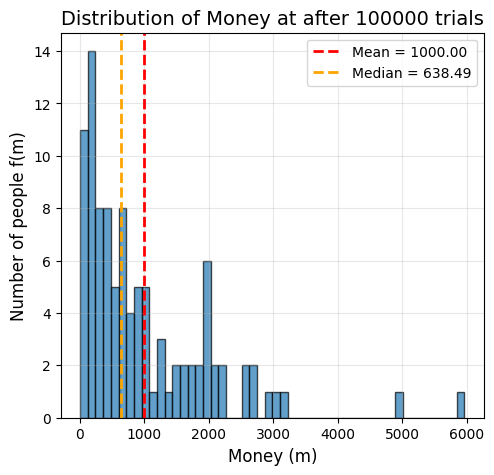

In [28]:
plt.figure(figsize=(12, 5))

# Histogram of money distribution
plt.subplot(1, 2, 1)
plt.hist(people, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Money (m)', fontsize=12)
plt.ylabel('Number of people f(m)', fontsize=12)
plt.title(f'Distribution of Money at after {num_transactions} trials', fontsize=14)
plt.axvline(np.mean(people), color='red', linestyle='--', linewidth=2, label=f'Mean = {np.mean(people):.2f}')
plt.axvline(np.median(people), color='orange', linestyle='--', linewidth=2, label=f'Median = {np.median(people):.2f}')
plt.legend()
plt.grid(True, alpha=0.3)


## Savings Model

Now we implement the savings model where agents save a fraction λ (lambda) of their money before transactions.

The modified exchange equations are:
- $m'_i = m_i + \delta m$ (1.2a)
- $m'_j = m_j - \delta m$ (1.2b)
- $\delta m = (1-\lambda)[\epsilon m_j - (1-\epsilon)m_i]$ (1.2c)
- $\delta m = \epsilon m_j - (1-\epsilon)m_i - \lambda \epsilon m_j+ \lambda (1-\epsilon) m_i $

$\delta m$ can be understood as what they would exchange without savings, minus what $m_j$ is withholding, plus what $m_i$ is withholding. 

We will test λ values: 0.25, 0.50, 0.75, and 0.9 to see if the form of f(m) changes.

In [29]:
def exchange_with_savings(people, i, j, lambda_savings):
    """
    Exchange money between two agents with savings.
    
    Parameters:
    - people: list of money amounts
    - i, j: indices of two agents
    - lambda_savings: fraction of money saved before transaction (λ)
    """
    # Random ratio between 0 and 1
    epsilon = random.random()
    
    # Calculate the transaction amount (equation 1.2c)
    delta_m = (1 - lambda_savings) * (epsilon * people[j] - (1 - epsilon) * people[i])
    
    # Update money (equations 1.2a and 1.2b)
    people[i] = people[i] + delta_m
    people[j] = people[j] - delta_m

### Simulation with Different λ Values

In [30]:
# Test different values of lambda (savings rate)
lambda_values = [0.0, 0.25, 0.50, 0.75, 0.9, 0.99, 0.999, 0.999999, 1.0]

# Parameters for each lambda (some need more transactions to reach equilibrium)
# Set them all the same for consistency (10^7)
transaction_counts = {
    # 0.0: 100000,
    # 0.25: 500000,
    # 0.50: 1000000,
    # 0.75: 5000000,
    # 0.9: 10000000
    0.0: 10000000,
    0.25: 10000000,
    0.50: 10000000,
    0.75: 10000000,
    0.9: 10000000,
    0.99: 10000000,
    0.999: 10000000,
    0.999999: 10000000,
    1.0: 10000000
}

results = {}

print("Running simulations with different savings rates (λ)...\n")

for lambda_val in lambda_values:
    print(f"λ = {lambda_val}:")
    
    # Initialize agents
    people_savings = [m0 for _ in range(N)]
    num_trans = transaction_counts[lambda_val]
    
    # Run simulation
    for transaction in range(num_trans):
        i = random.randint(0, N - 1)
        j = random.randint(0, N - 1)
        while i == j:
            j = random.randint(0, N - 1)
        
        exchange_with_savings(people_savings, i, j, lambda_val)
    
    # Store results
    results[lambda_val] = people_savings.copy()
    
    # Calculate statistics
    mean_money = np.mean(people_savings)
    std_money = np.std(people_savings)
    median_money = np.median(people_savings)
    min_money = min(people_savings)
    max_money = max(people_savings)
    
    print(f"  Transactions: {num_trans:,}")
    print(f"  Mean: {mean_money:.2f}, Std: {std_money:.2f}")
    print(f"  Median: {median_money:.2f} ")
    print(f"  Min: {min_money:.2f}, Max: {max_money:.2f}")
    print(f"  Total money conserved: {sum(people_savings):.2f} (should be {N * m0})")
    print()

print("Simulation complete!")

Running simulations with different savings rates (λ)...

λ = 0.0:
  Transactions: 10,000,000
  Mean: 1000.00, Std: 1023.06
  Median: 709.04 
  Min: 0.99, Max: 5531.65
  Total money conserved: 100000.00 (should be 100000)

λ = 0.25:
  Transactions: 10,000,000
  Mean: 1000.00, Std: 644.50
  Median: 821.15 
  Min: 104.37, Max: 2903.17
  Total money conserved: 100000.00 (should be 100000)

λ = 0.5:
  Transactions: 10,000,000
  Mean: 1000.00, Std: 514.50
  Median: 850.59 
  Min: 223.59, Max: 3235.84
  Total money conserved: 100000.00 (should be 100000)

λ = 0.75:
  Transactions: 10,000,000
  Mean: 1000.00, Std: 330.07
  Median: 933.55 
  Min: 504.46, Max: 2193.63
  Total money conserved: 100000.00 (should be 100000)

λ = 0.9:
  Transactions: 10,000,000
  Mean: 1000.00, Std: 209.98
  Median: 966.99 
  Min: 513.76, Max: 1526.25
  Total money conserved: 100000.00 (should be 100000)

λ = 0.99:
  Transactions: 10,000,000
  Mean: 1000.00, Std: 59.13
  Median: 997.67 
  Min: 885.56, Max: 1137.11
 

### Visualize Distribution Changes with λ

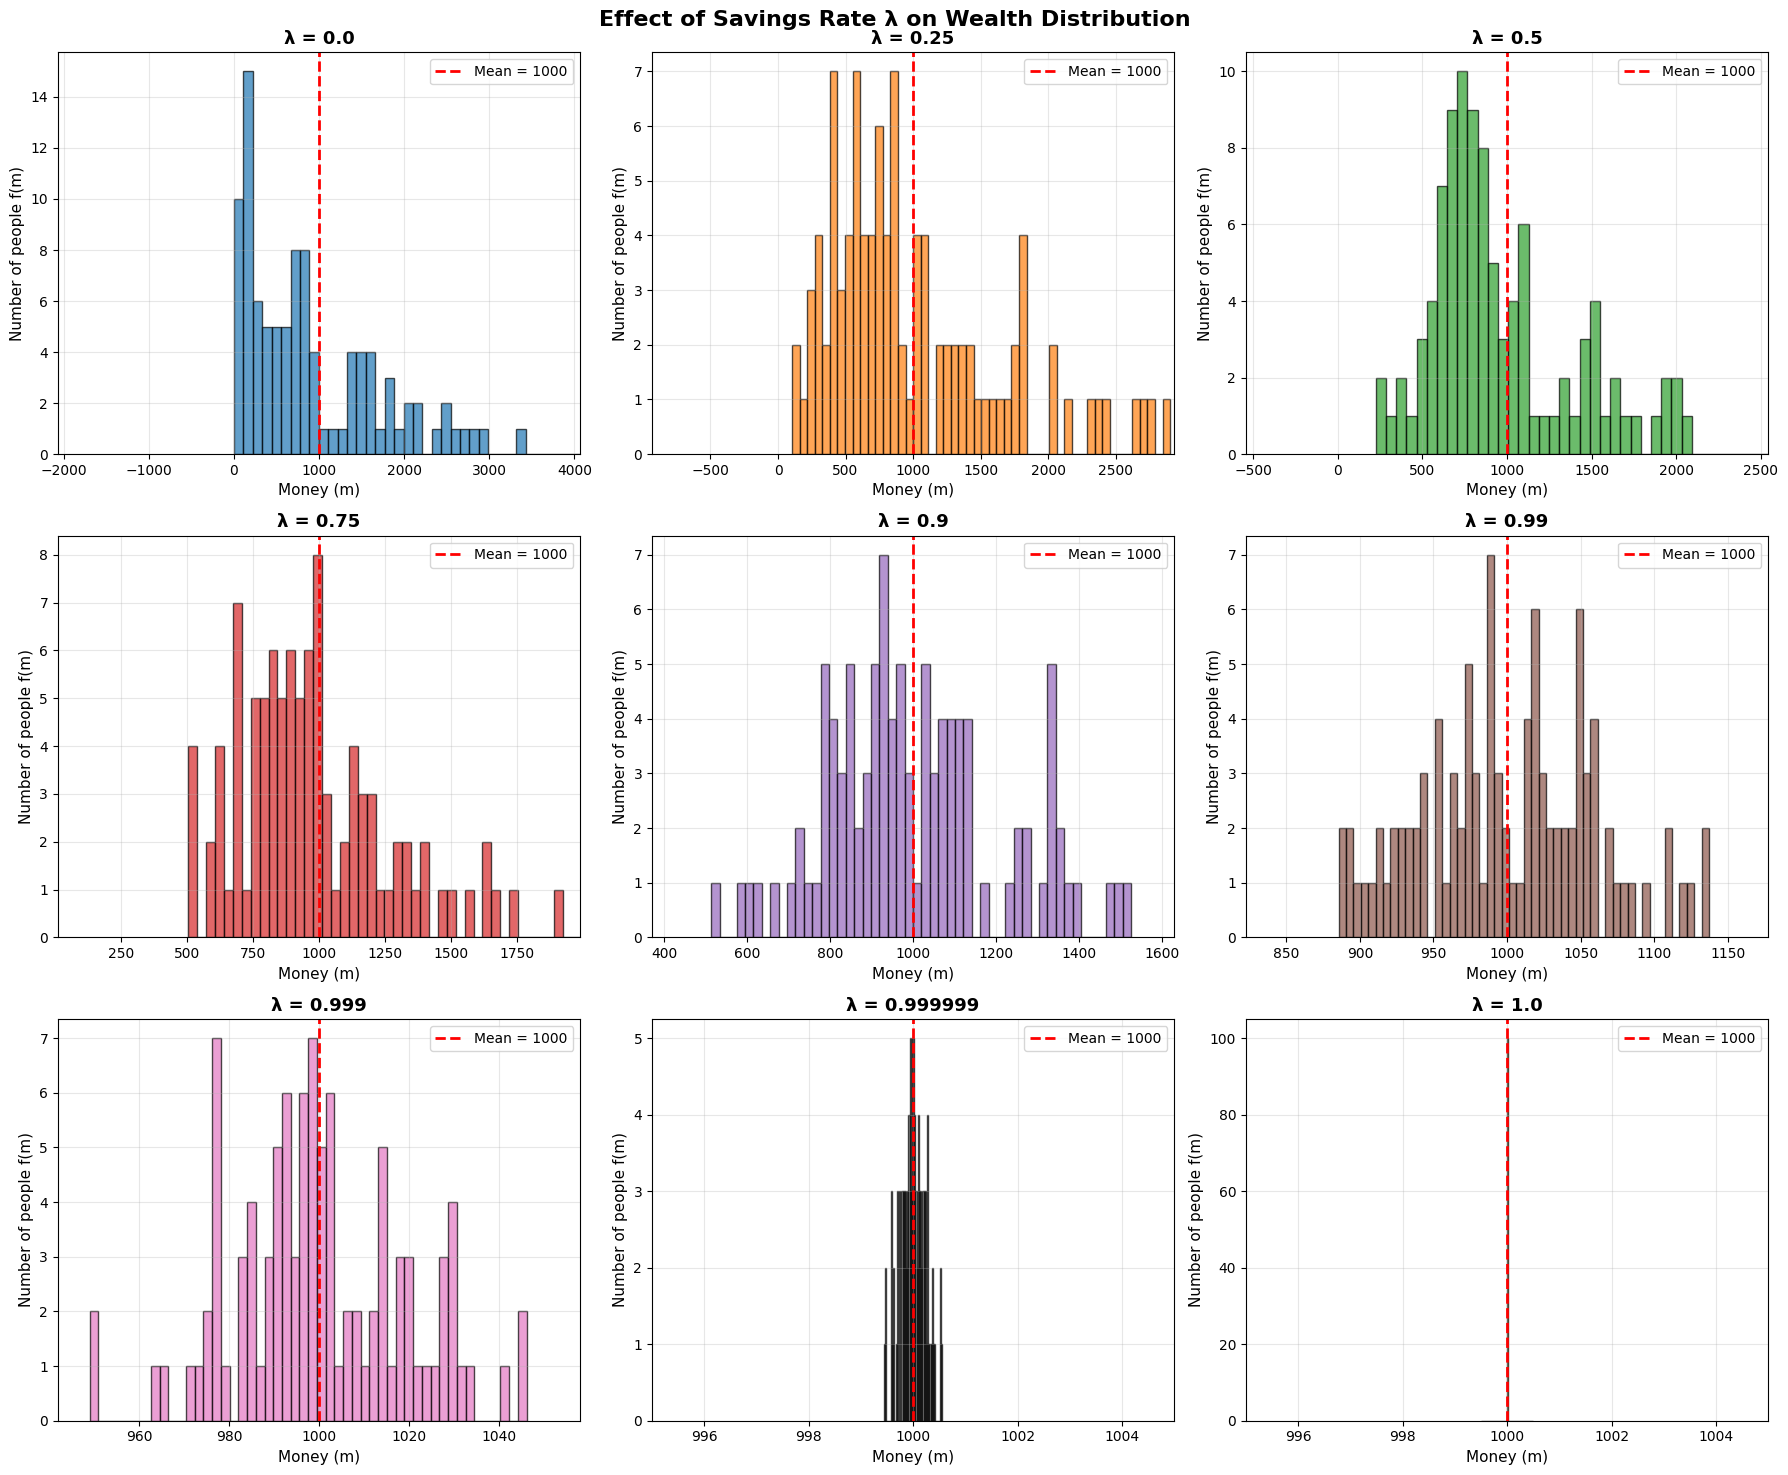

In [31]:
# Plot distributions for different lambda values
import math

cols = 3
rows = math.ceil(len(lambda_values) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axes = np.array(axes).reshape(-1)

for idx, lambda_val in enumerate(lambda_values):
    ax = axes[idx]
    people_data = results[lambda_val]
    
    # Histogram
    ax.hist(people_data, bins=50, edgecolor='black', alpha=0.7, color=f'C{idx}')
    ax.set_xlabel('Money (m)', fontsize=11)
    ax.set_ylabel('Number of people f(m)', fontsize=11)
    ax.set_title(f'λ = {lambda_val}', fontsize=13, fontweight='bold')
    mean_val = float(np.mean(people_data))
    std_val = float(np.std(people_data))
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
               label=f'Mean = {mean_val:.0f}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Keep x-axis readable for near-degenerate cases (high λ)
    half_window = max(std_val * 3, np.ptp(people_data) / 2, 5.0)
    ax.set_xlim(mean_val - half_window, mean_val + half_window)
    ax.ticklabel_format(style='plain', axis='x', useOffset=False)

# Hide any unused subplots
for ax in axes[len(lambda_values):]:
    ax.axis('off')

plt.suptitle('Effect of Savings Rate λ on Wealth Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Analysis: Does the form of f(m) change for λ > 0?

**Key Findings:**

1. **λ = 0 (No savings)**: High amounts of agents with close to 0 money

2. **λ > 0 (With savings)**: As λ increases:
   - The distribution becomes more concentrated around the mean
   - The form of f(m) seems to shift closer to a normal distribution
   - The agents with the most money have less (lower extremes)

3. **Interpretation**: 
   - When agents save a fraction of their money, they protect themselves from going broke
   - Higher savings rates lead to more stable wealth distributions

### Top 10% Wealth Share Across λ

Reports what fraction of total wealth the richest 10% of agents hold for each savings rate.

In [32]:
# Compute top 10% wealth share for each lambda
summary_rows = []
for lambda_val in lambda_values:
    wealth = sorted(results[lambda_val], reverse=True)
    top_n = max(1, int(0.10 * len(wealth)))
    top_wealth = sum(wealth[:top_n])
    total_wealth = sum(wealth)
    share = 100 * top_wealth / total_wealth if total_wealth else 0.0
    summary_rows.append((lambda_val, top_n, share))

print(f"Top 10% wealth share by savings rate (λ):")
print(f"{'λ':<10} {'Top 10% count':<15} {'Wealth share (%)':<18}")
print('-' * 46)
for lam, count, share in summary_rows:
    print(f"{lam:<10} {count:<15} {share:>6.2f}")

Top 10% wealth share by savings rate (λ):
λ          Top 10% count   Wealth share (%)  
----------------------------------------------
0.0        10               32.88
0.25       10               24.31
0.5        10               21.46
0.75       10               17.42
0.9        10               14.00
0.99       10               11.07
0.999      10               10.35
0.999999   10               10.00
1.0        10               10.00
